# Step 0. Parameter Setting 

In [2]:
import dtnmonitor_v2 as dtn
import os,sys


### P1. SELECT THE USERNAME 
## the user you want to monitor, usually the login account 
user="sc17"

### P3. NUTTCP THREADS
## used in Step 2 :input threads number
count = 8


### P5.  SELECT THE MONITOR NETWORK INTERFACE  ###
## used in Step 4 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'ens1f0.3061'
#dtn.interface = 'eth1'
#dtn.interface = 'all'



## run fio and check status
### select graph_mode [0|1] 
#graph_mode=0  # all, 
#graph_mode=1  # 100pt
graph_mode=0  

### Show Disk and Interface
import netifaces
import os
list=netifaces.interfaces()
print("==========================================================")
print('{:40s} {:20s} '.format("Network Interface","IP"))
print("==========================================================")
for inf in list:
    #print(inf)
    ff=netifaces.ifaddresses(inf)
    #print(ff)
    try:
        addr=ff[netifaces.AF_INET][0]['addr']
    except:
        continue
    print('{:40s} {:20s} '.format(inf,addr)) 
import subprocess
import re
df = subprocess.Popen(["df","-h"], stdout=subprocess.PIPE)
output = df.communicate()[0]
dfs = output.decode("utf8").split("\n")
dfs.pop(0)

        
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)

Network Interface                        IP                   
lo                                       127.0.0.1            
enp20s0                                  165.124.33.143       
ens1f0.3061                              192.168.61.50        
ens1f0.2038                              10.250.38.50         
ens4.1301                                10.10.14.251         


# Step 1. Start servers for network by Iperf3

In [3]:
for i in range(count):
    command = "iperf3 -s -D -p 5400"+ str(i) 
    #print(command)
    os.system(command)
    #dtn.exec_sysout(command)
    
exec_print("sleep 3 ;ps -u "+ user +" ux |grep iperf3")

sc17     14520  0.0  0.0  43076   512 ?        Ss   10:59   0:00 iperf3 -s -D -p 54000
sc17     14522  0.0  0.0  43076   508 ?        Ss   10:59   0:00 iperf3 -s -D -p 54001
sc17     14524  0.0  0.0  43076   508 ?        Ss   10:59   0:00 iperf3 -s -D -p 54002
sc17     14526  0.0  0.0  43076   508 ?        Ss   10:59   0:00 iperf3 -s -D -p 54003
sc17     14528  0.0  0.0  43076   508 ?        Ss   10:59   0:00 iperf3 -s -D -p 54004
sc17     14530  0.0  0.0  43076   504 ?        Ss   10:59   0:00 iperf3 -s -D -p 54005
sc17     14532  0.0  0.0  43076   504 ?        Ss   10:59   0:00 iperf3 -s -D -p 54006
sc17     14534  0.0  0.0  43076   504 ?        Ss   10:59   0:00 iperf3 -s -D -p 54007
sc17     14535  0.0  0.0 113136  2836 ?        S    10:59   0:00 /bin/sh -c sleep 3 ;ps -u sc17 ux |grep iperf3
sc17     14545  0.0  0.0 112664  2288 ?        S    11:00   0:00 grep iperf3


# Step 2. Start Monitor

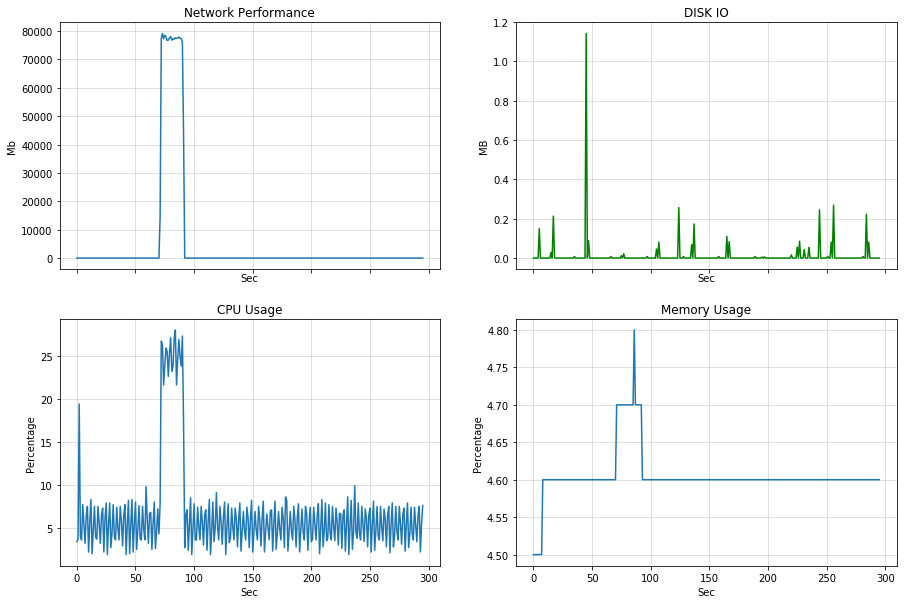

None

In [4]:
dtn.exec_command("python callmonitor_v2.py",graph_mode)

## Step A . stop the Iperf3 server

In [5]:
exec_print("killall -u "+user+" iperf3")

## Step B . check Iperf3 server status

In [6]:
exec_print("ps -u "+ user +" ux |grep iperf3")

sc17     16526  0.0  0.0 113136  2788 ?        S    11:11   0:00 /bin/sh -c ps -u sc17 ux |grep iperf3
sc17     16528  0.0  0.0 112664  2300 ?        S    11:11   0:00 grep iperf3
